In [24]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from dense import Dense
from convolutional import Convolutional
from reshape import Reshape
from activations import Sigmoid, Tanh,Linear
from losses import binary_cross_entropy, binary_cross_entropy_prime,cross_entropy,cross_entropy_prime
from network import train, predict


## preprocess the data

In [59]:
def preprocess_data(x, y, limit):
    # zero_index = np.where(y == 0)[0][:limit]
    # one_index = np.where(y == 1)[0][:limit]
    # all_indices = np.hstack((zero_index, one_index))
    # all_indices = np.random.permutation(all_indices)
    # x, y = x[all_indices], y[all_indices]
    # x = x.reshape(len(x), 1, 28, 28)
    # x = x.astype("float32") / 255
    # y = np_utils.to_categorical(y)
    #y = y.reshape(len(y), 2, 1)
    y=np.utils.to_categorical(y)
    return x, y


## Load the Data

In [60]:
data = mnist.load_data()
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [63]:
# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 1000)
x_test, y_test = preprocess_data(x_test, y_test, 200)

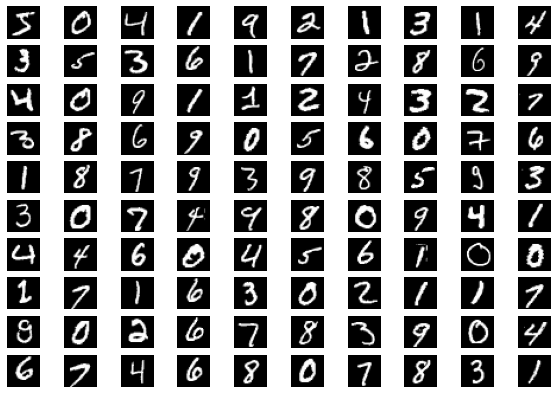

In [47]:
#show first 20 images present in x_train


fig = plt.figure(figsize=(10, 7))

for i in range(100):
    fig.add_subplot(10, 10, i+1)
    plt.imshow(data[0][0][i], 'gray')
    plt.axis('off')

plt.show()
    

In [64]:
y_train[6]


1

In [65]:
#print the size of the training and test data
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


## Train the Network

In [20]:

# Train this CNN on mnist dataset. Layer 1: Convolution layer with 16 out-
# put channels+flatten+tanh activation. Layer 2: 10 output neuron with linear
# activation. Softmax cross entropy loss

# network = [
#     Convolutional((1, 28, 28), 3, 16),
#     #Reshape((16, 26, 26), (16 * 26 * 26, 1)),
#     Tanh(),
#     Reshape((16, 26, 26), (16 * 26 * 26, 1)),
#     Dense(16 * 26 * 26, 10),
#     # implemet the second layer
#     Linear(),
#     Dense(10, 2),
#     Linear()
#     # Linear()
# ]
# neural network
network = [
    Convolutional((1, 28, 28), 3, 16),
    Sigmoid(),
    Reshape((16, 26, 26), (16 * 26 * 26, 1)),
    Dense(16 * 26 * 26, 100),
    Sigmoid(),
    Dense(100, 2),
    Sigmoid()
]

In [21]:
# train
train(
    network,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    # cross_entropy,
    # cross_entropy_prime,
    x_train,
    y_train,
    
    epochs=20,
    learning_rate=0.1
)

1/20, error=0.7763598881469046
2/20, error=0.8978851894683284
3/20, error=0.8180734453456376
4/20, error=0.6071733617927301
5/20, error=0.7965275686204486
6/20, error=0.30238875691263417


KeyboardInterrupt: 

## Test the Data

In [ ]:
# test
test=[]
pred=[]
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    test.append(np.argmax(output))
    pred.append(np.argmax(y))
    #print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))
#find the accuracy
print('accuracy:',np.sum(np.array(test)==np.array(pred))*100/len(test))

accuracy: 100.0
